Accuracy: 0.6961979261415318


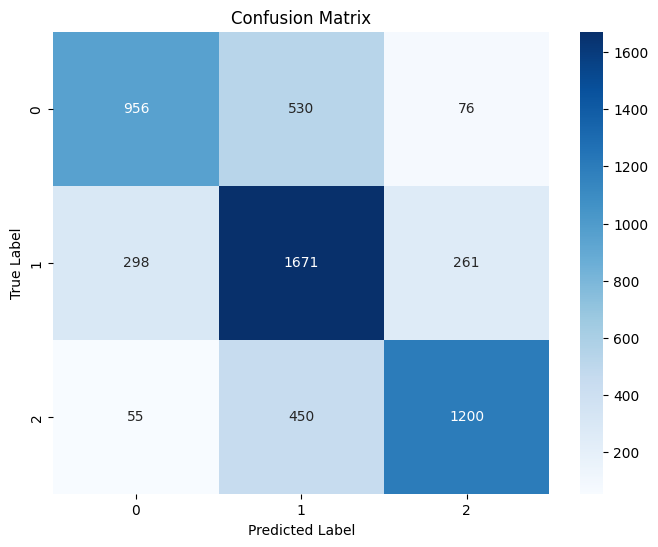

['vectorizer.pkl']

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv', encoding='latin1')

# Handle missing values in the text column
data['text'].fillna('', inplace=True)

# Specify the column names for features and target labels
text_column = 'text'
label_column = 'sentiment'

# Split the dataset into features (X) and target labels (y)
X = data[text_column]
y = data[label_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')
